In [1]:
# Import
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pickle
import matplotlib.pyplot as plt

Dummy word pair for training:  
eng: (2, 1)  
ita: (1, 2)

In [2]:
eng_vec = np.asarray([2, 1])
ita_vec = np.asarray([1, 2])

eng_vec = eng_vec / np.linalg.norm(eng_vec)
ita_vec = ita_vec / np.linalg.norm(ita_vec)

eng_vec
ita_vec

array([ 0.89442719,  0.4472136 ])

array([ 0.4472136 ,  0.89442719])

In [26]:
def read_T(T_fn):
    with open(T_fn, 'rb') as f:
        data = pickle.load(f)
    return data

def get_sing(T):
    U, s, V = np.linalg.svd(T, full_matrices=True, compute_uv=True)
    print('singular:')
    print(s)

def plot(v1, v2, T_fn):
    T = read_T(T_fn)
    
    print('T0:')
    print(T[0])
    get_sing(T[0])
    print('T1:')
    print(T[1])
    get_sing(T[1])
    
    plt.xlim(xmin=0.0)
    plt.xlim(xmax=1.0)
    plt.ylim(ymin=0.0)
    plt.ylim(ymax=1.0)
    
    plt.scatter(v1[0], v1[1], color='blue')
    plt.scatter(v2[0], v2[1], color='gold')
    plt.grid()
    plt.show()
    
#     plt.xlim(xmin=0.0)
#     plt.xlim(xmax=1.0)
#     plt.ylim(ymin=0.0)
#     plt.ylim(ymax=1.0)
    
    vt1 = np.dot(v1, T[0])
    vt2 = np.dot(v2, T[1])
    vt1 = vt1 / np.linalg.norm(vt1)
    vt2 = vt2 / np.linalg.norm(vt2)
    plt.scatter(vt1[0], vt1[1], color='blue')
    plt.scatter(vt2[0], vt2[1], color='gold')
    plt.grid()
    plt.show()
    
def map_points(vecs, T0, T1):    
    vecs_norm = vecs / np.sqrt((vecs ** 2).sum(1))[:, None]
    vecs_T0 = np.dot(vecs_norm, T0)
    vecs_T0_norm = vecs_T0 / np.sqrt((vecs_T0 ** 2).sum(1))[:, None]
    vecs_T1 = np.dot(vecs_norm, T1)
    vecs_T1_norm = vecs_T1 / np.sqrt((vecs_T1 ** 2).sum(1))[:, None]
    
    for i, row in enumerate(vecs_T0_norm):
        print('{0}\t{1}\t{2}\t{3}'.format(vecs[i], vecs_norm[i], vecs_T0_norm[i], vecs_T1_norm[i]))
        
    plt.scatter(vecs_norm[:, 0], vecs_norm[:,1], color='green')
    plt.scatter(vecs_T0_norm[:, 0], vecs_T0_norm[:,1], color='red')
    plt.scatter(vecs_T1_norm[:, 0], vecs_T1_norm[:,1], color='purple')
    plt.grid()
    plt.show()

Green : original  
Red : transform with T0  
Purple: transform with T1  

Blue : lang1  
Gold : lang2

SVD 100
[ 1.  0.]	[ 1.  0.]	[ 0.45833834  0.8887778 ]	[ 0.99637813 -0.0850331 ]
[ 0.5  0.5]	[ 0.70710678  0.70710678]	[ 0.92394017  0.38253701]	[ 0.90292312  0.4298021 ]
[ 2.  1.]	[ 0.89442719  0.4472136 ]	[ 0.74007336  0.67252615]	[ 0.97770902  0.20996444]
[ 1.  2.]	[ 0.4472136   0.89442719]	[ 0.9977147  -0.06756762]	[ 0.74007327  0.67252625]


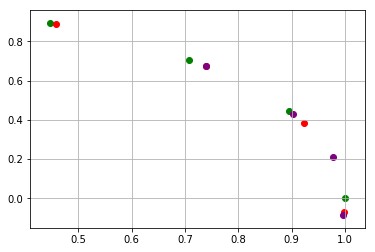

T0:
[[ 0.48080897  0.93235129]
 [ 0.52065676 -0.51771653]]
singular:
[ 1.08818936  0.67484373]
T1:
[[ 1.20483005 -0.10282285]
 [ 0.1790837   0.7615822 ]]
singular:
[ 1.21813846  0.76837814]


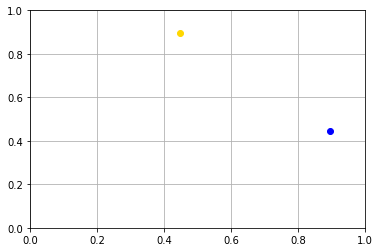

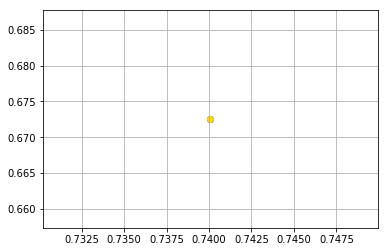

In [27]:
# With SVD 100 epochs
print('SVD 100')
T_fn = '/mnt/permanent/home/eszti/dipterv/panlex/output/20180422_1819_58/train_mod/T_99.pickle'
T = read_T(T_fn)
vecs = np.asarray([[1, 0],[0.5, 0.5],[2,1],[1,2]])
map_points(vecs, T[0], T[1])
plot(eng_vec, ita_vec, T_fn)

SVD 1000
[ 1.  0.]	[ 1.  0.]	[-0.96915063 -0.24646919]	[ 0.24163794 -0.97036648]
[ 0.5  0.5]	[ 0.70710678  0.70710678]	[-0.51189058 -0.85905066]	[-0.51250385 -0.85868493]
[ 2.  1.]	[ 0.89442719  0.4472136 ]	[-0.75746298 -0.65287811]	[-0.21564921 -0.9764709 ]
[ 1.  2.]	[ 0.4472136   0.89442719]	[-0.21280908 -0.9770938 ]	[-0.75769826 -0.65260504]


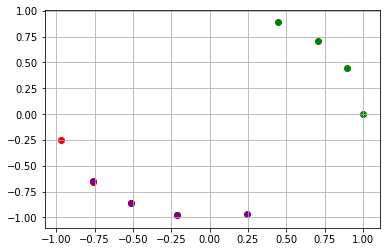



T0:
[[-0.97015584 -0.24672483]
 [ 0.24798912 -0.96520954]]
singular:
[ 1.00134957  0.99624425]
T1:
[[ 0.24241737 -0.9734965 ]
 [-0.96848762 -0.24301258]]
singular:
[ 1.00338972  0.99834561]


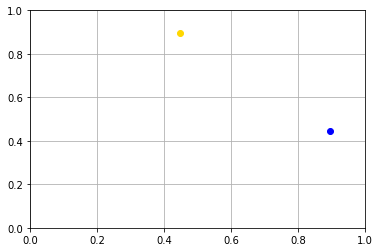

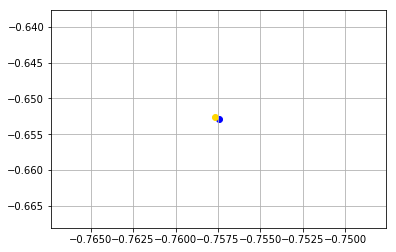

In [28]:
# With SVD 1000 epochs
print('SVD 1000')
T_fn = '/mnt/permanent/home/eszti/dipterv/panlex/output/20180422_1913_57/train_mod/T_999.pickle'
T = read_T(T_fn)
vecs = np.asarray([[1, 0],[0.5, 0.5],[2,1],[1,2]])
map_points(vecs, T[0], T[1])
print('\n')
plot(eng_vec, ita_vec, T_fn)

no SVD 100
[ 1.  0.]	[ 1.  0.]	[-0.74810335 -0.66358223]	[-0.75650172  0.6539917 ]
[ 0.5  0.5]	[ 0.70710678  0.70710678]	[-0.28946602  0.95718829]	[-0.81771973  0.57561657]
[ 2.  1.]	[ 0.89442719  0.4472136 ]	[-0.8771601   0.48019804]	[-0.78709117  0.61683668]
[ 1.  2.]	[ 0.4472136   0.89442719]	[-0.00918652  0.9999578 ]	[-0.8771602   0.48019786]


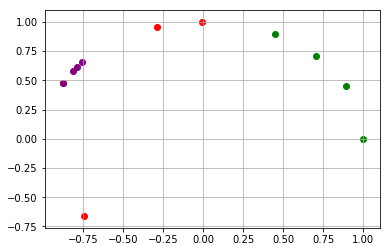

T0:
[[-0.62343848 -0.55300206]
 [ 0.29933316  1.62473345]]
singular:
[ 1.7886889   0.47374895]
T1:
[[-1.54660714  1.33703363]
 [-0.02017647 -0.23412932]]
singular:
[ 2.04910278  0.18987955]


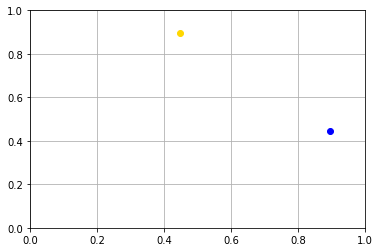

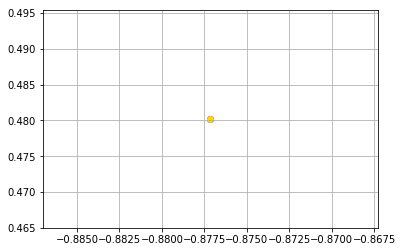

In [29]:
# Wtihout SVD 100 epochs
print('no SVD 100')
T_fn = '/mnt/permanent/home/eszti/dipterv/panlex/output/20180422_1832_25/train_mod/T_99.pickle'
T = read_T(T_fn)
vecs = np.asarray([[1, 0],[0.5, 0.5],[2,1],[1,2]])
map_points(vecs, T[0], T[1])
plot(eng_vec, ita_vec, T_fn)

no SVD 1000
[ 1.  0.]	[ 1.  0.]	[-0.63603128 -0.77166328]	[-0.81425982  0.5805006 ]
[ 0.5  0.5]	[ 0.70710678  0.70710678]	[-0.60488815 -0.79631044]	[-0.86580214 -0.5003865 ]
[ 2.  1.]	[ 0.89442719  0.4472136 ]	[-0.61545566 -0.78817151]	[-0.9990244  -0.04416165]
[ 1.  2.]	[ 0.4472136   0.89442719]	[-0.59413736 -0.8043636 ]	[-0.61545563 -0.78817154]


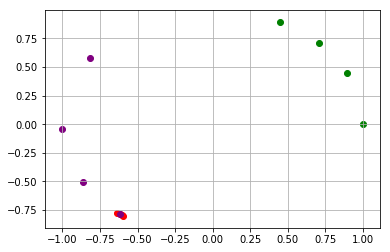

T0:
[[-0.64352316 -0.78075278]
 [-0.56677765 -0.81255859]]
singular:
[ 1.41490543  0.05681443]
T1:
[[-0.42514232  0.30309168]
 [-0.17793132 -0.65163541]]
singular:
[ 0.71905524  0.46028075]


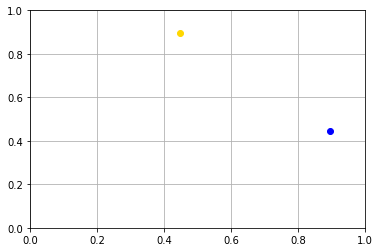

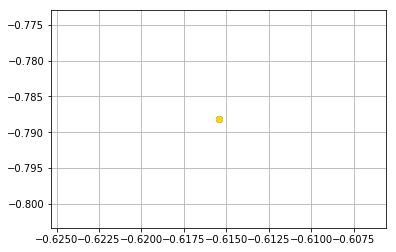

In [30]:
# Without SVD 1000 epochs
print('no SVD 1000')
T_fn = '/mnt/permanent/home/eszti/dipterv/panlex/output/20180422_1909_34/train_mod/T_999.pickle'
T = read_T(T_fn)
vecs = np.asarray([[1, 0],[0.5, 0.5],[2,1],[1,2]])
map_points(vecs, T[0], T[1])
plot(eng_vec, ita_vec, T_fn)